In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df[df.TotalCharges!=' ']['TotalCharges'].astype('float32').median()
df['TotalCharges']=df['TotalCharges'].astype('float32')

In [18]:
df['TotalCharges'][df['TotalCharges']==' ']=df[df.TotalCharges!=' ']['TotalCharges'].astype('float32').median()

C:\Users\zuber\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\zuber\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df['TotalCharges'][df['TotalCharges']==' ']

Series([], Name: TotalCharges, dtype: float32)

In [20]:
df.TotalCharges.value_counts()

20.200001      11
1397.000000    11
19.750000       9
19.650000       8
20.049999       8
               ..
1451.599976     1
1173.349976     1
5589.450195     1
3810.550049     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
if not df.isnull().sum().sum():
    print('Nie ma brakow')

Nie ma brakow


In [29]:
categorical=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','Contract','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']
numerical=['tenure','MonthlyCharges','TotalCharges']

for col in categorical:
    df[col]=df[col].astype('category')

for col in numerical:
    df[col]=df[col].astype('float32')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [31]:
df=df.drop(columns=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [33]:
df.describe(include=['category'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


No     5174
Yes    1869
Name: Churn, dtype: int64


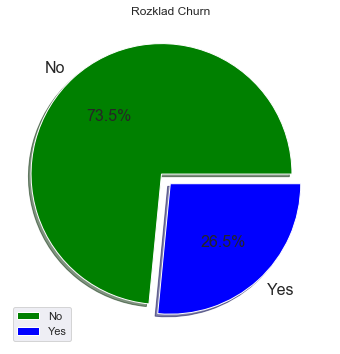

In [52]:
plt.figure(figsize=(8,6))
sns.set()
df.Churn.value_counts().plot(kind='pie',
                            fontsize=16, colors=['green','blue'],
                            explode=[0.1,0],
                            shadow=True,
                            autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozklad Churn')
print(df.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


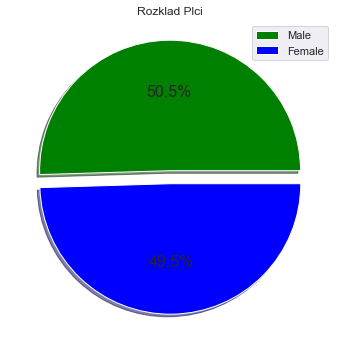

In [61]:
plt.figure(figsize=(8,6))
sns.set()
df.gender.value_counts().plot(kind='pie',
                            fontsize=16, colors=['green','blue'],
                            labels=['',''],
                            explode=[0.1,0],
                            shadow=True,
                            autopct='%1.1f%%')
plt.legend(['Male','Female'])
plt.ylabel('')
plt.title('Rozklad Plci')
print(df.gender.value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


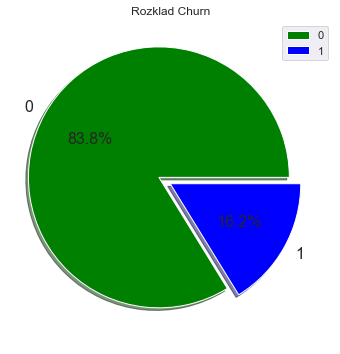

In [62]:
plt.figure(figsize=(8,6))
sns.set()
df.SeniorCitizen.value_counts().plot(kind='pie',
                            fontsize=16, colors=['green','blue'],
                            explode=[0.1,0],
                            shadow=True,
                            autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozklad Churn')
print(df.SeniorCitizen.value_counts())

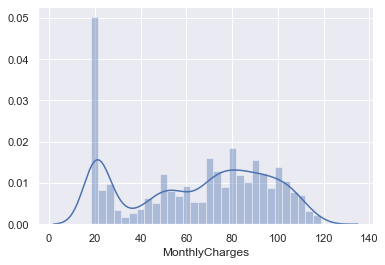

In [64]:
sns.distplot(df.MonthlyCharges,bins=30)

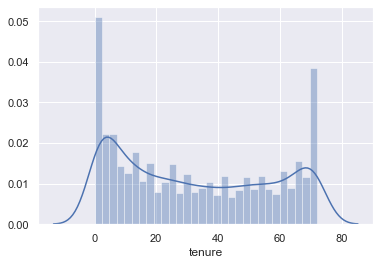

In [65]:
sns.distplot(df.tenure,bins=30)

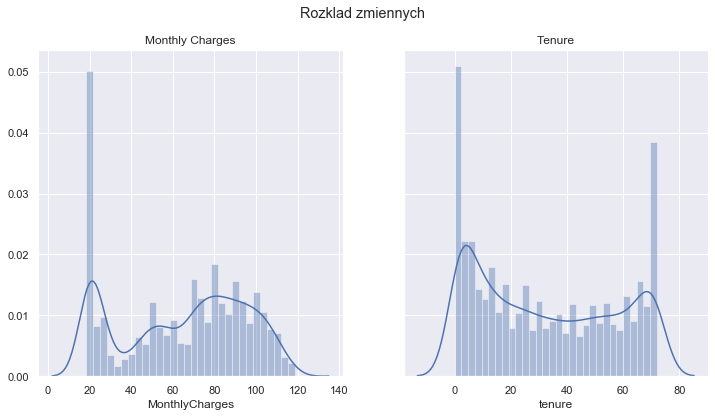

In [73]:
fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,6))
sns.distplot(df.MonthlyCharges,bins=30,ax=ax[0])
sns.distplot(df.tenure,bins=30,ax=ax[1])
fig.suptitle('Rozklad zmiennych')
ax[0].title.set_text('Monthly Charges')
ax[1].title.set_text('Tenure')


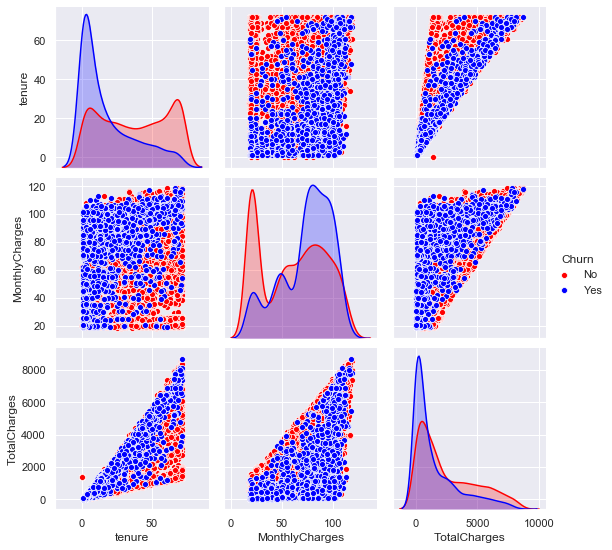

In [76]:
sns.pairplot(data=df,vars=['tenure','MonthlyCharges','TotalCharges'],
            hue='Churn',palette=['red','blue'])

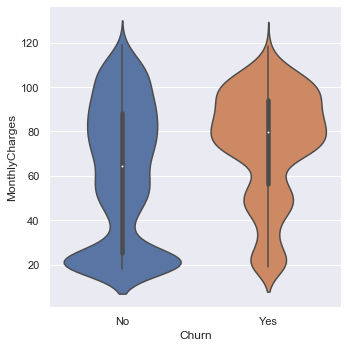

In [79]:
sns.catplot(data=df,x='Churn',y='MonthlyCharges',
           kind='violin')

In [80]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650865
TotalCharges,0.825464,0.650865,1.000000


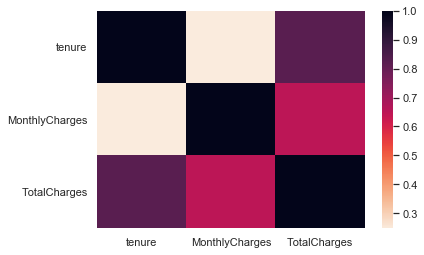

In [86]:
sns.heatmap(df.corr(),cmap='rocket_r')